#This notebook has been created for the EDA of the first dataset (Kaggle one). Reminder of the scope : Focus on the compensation factor

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


In [54]:

file_path = '/content/Consulting_survey_DataSet (3).csv'
df = pd.read_csv(file_path)

# Renaming columns for easier usage
df.columns = [
    'timestamp',
    'current_consulting_firm',
    'current_firm',
    'current_practice',
    'current_title',
    'current_country',
    'current_compensation_usd',
    'estimated_bonus_usd_2021',
    'expected_total_compensation',
    'weekly_hours',
    'offer_received',
    'offer_from_consulting_firm',
    'highest_offer_firm',
    'offer_practice',
    'offered_title',
    'offer_country',
    'highest_offer_compensation_usd',
    'highest_offer_bonus_usd',
    'accepted_offer'
]

In [55]:
#Step 2 Extensive EDA & making the initial Exploration of Each Variable

#Based on the df, we're gonna explore the missings values (in proportion)
def explore_variable(df):
    summary = []
    for col in df.columns:
        data_type = df[col].dtype
        unique_vals = df[col].nunique()
        missing_vals = df[col].isnull().sum()
        missing_percentage = (missing_vals / len(df)) * 100
        sample_vals = df[col].dropna().unique()[:5]  # Sample of unique values (first 5 for brevity)

        summary.append({
            'Variable': col,
            'Data Type': data_type,
            'Unique Values': unique_vals,
            'Missing Values': missing_vals,
            'Missing %': missing_percentage,
            'Sample Values': sample_vals
        })

    summary_df = pd.DataFrame(summary)
    return summary_df

#Showing the variables
variable_summary = explore_variable(df)
print(variable_summary)


                          Variable Data Type  Unique Values  Missing Values  \
0                        timestamp    object           4134               0   
1          current_consulting_firm    object              2               1   
2                     current_firm    object             34             276   
3                 current_practice    object              3             276   
4                    current_title    object              7             276   
5                  current_country    object             84               0   
6         current_compensation_usd   float64           1195               0   
7         estimated_bonus_usd_2021   float64            640               0   
8      expected_total_compensation   float64           1565               0   
9                     weekly_hours    object              7               0   
10                  offer_received    object              2               0   
11      offer_from_consulting_firm    object        

In [56]:
print(df.columns)

Index(['timestamp', 'current_consulting_firm', 'current_firm',
       'current_practice', 'current_title', 'current_country',
       'current_compensation_usd', 'estimated_bonus_usd_2021',
       'expected_total_compensation', 'weekly_hours', 'offer_received',
       'offer_from_consulting_firm', 'highest_offer_firm', 'offer_practice',
       'offered_title', 'offer_country', 'highest_offer_compensation_usd',
       'highest_offer_bonus_usd', 'accepted_offer'],
      dtype='object')


In [57]:
# Calculate the total number of respondents
total_respondents = len(df)

# Calculate the number and percentage of respondents who received an offer
offer_received_count = df['offer_received'].value_counts().get('Yes', 0)
offer_received_percentage = (offer_received_count / total_respondents) * 100

print(f"Total respondents: {total_respondents}")
print(f"Number of respondents who received an offer: {offer_received_count}")
print(f"Percentage of respondents who received an offer: {offer_received_percentage:.2f}%")

# Filter dataset to only include rows WHERE AN OFFER WAS RECEIVED
df_offer_received = df[df['offer_received'] == 'Yes']

# Calculate the percentage of missing values for offer-related fields in this subset
offer_related_columns = [
    'offer_from_consulting_firm',
    'highest_offer_firm',
    'offer_practice',
    'offered_title',
    'offer_country',
    'highest_offer_compensation_usd',
    'highest_offer_bonus_usd',
    'accepted_offer'
]

# Calculating missing values for offer-related columns among those who received an offer
missing_offer_related = df_offer_received[offer_related_columns].isnull().mean() * 100

# Displaying the results
print("\nMissing values percentage for offer-related columns (only for respondents who received an offer):")
print(missing_offer_related)


Total respondents: 4200
Number of respondents who received an offer: 1112
Percentage of respondents who received an offer: 26.48%

Missing values percentage for offer-related columns (only for respondents who received an offer):
offer_from_consulting_firm         0.000000
highest_offer_firm                43.794964
offer_practice                    43.794964
offered_title                     43.794964
offer_country                      0.000000
highest_offer_compensation_usd     0.000000
highest_offer_bonus_usd            0.000000
accepted_offer                     0.000000
dtype: float64


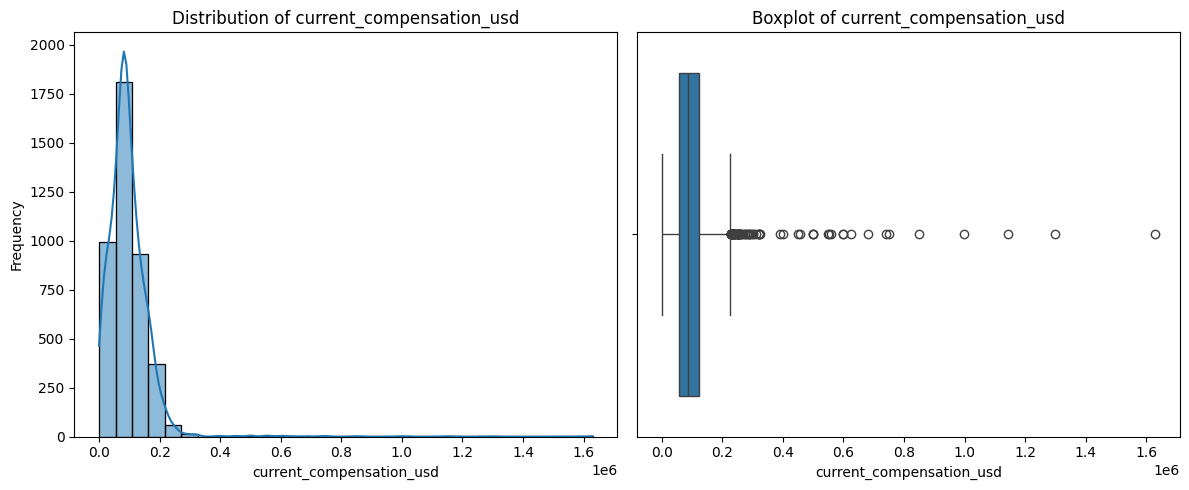

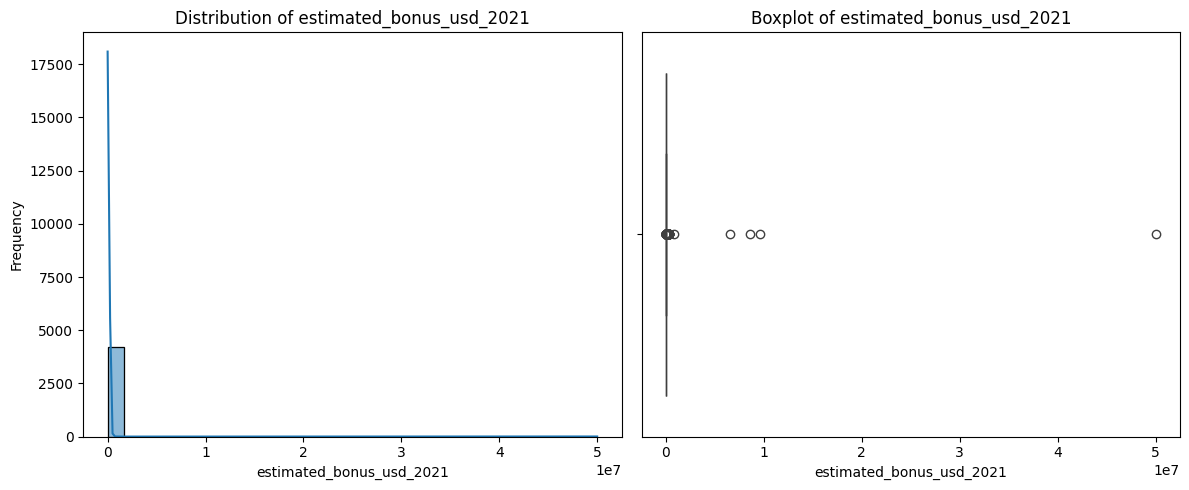

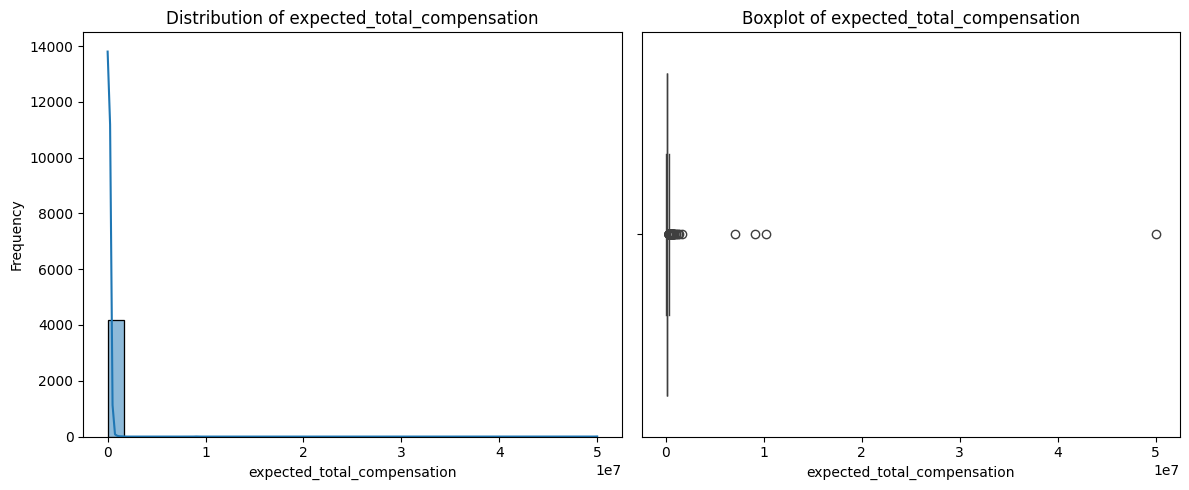

       current_compensation_usd  estimated_bonus_usd_2021  \
count              4.200000e+03              4.200000e+03   
mean               9.511478e+04              3.409546e+04   
std                7.147151e+04              8.029926e+05   
min                0.000000e+00              0.000000e+00   
25%                5.638000e+04              3.000000e+03   
50%                8.600000e+04              8.000000e+03   
75%                1.240000e+05              1.800000e+04   
max                1.630000e+06              5.000000e+07   

       expected_total_compensation  
count                 4.200000e+03  
mean                  1.292102e+05  
std                   8.091720e+05  
min                   0.000000e+00  
25%                   6.300000e+04  
50%                   9.650000e+04  
75%                   1.430000e+05  
max                   5.000000e+07  


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

df['current_compensation_usd'] = pd.to_numeric(df['current_compensation_usd'], errors='coerce')
df['estimated_bonus_usd_2021'] = pd.to_numeric(df['estimated_bonus_usd_2021'], errors='coerce')
df['expected_total_compensation'] = pd.to_numeric(df['expected_total_compensation'], errors='coerce')

# List of numeric columns to explore
numeric_columns = ['current_compensation_usd', 'estimated_bonus_usd_2021', 'expected_total_compensation']

# Plot distributions and boxplots for each numerical variable
for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot for Outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

# Checking for descriptive statistics to help identify typical values and potential outliers
stats_summary = df[numeric_columns].describe()
print(stats_summary)


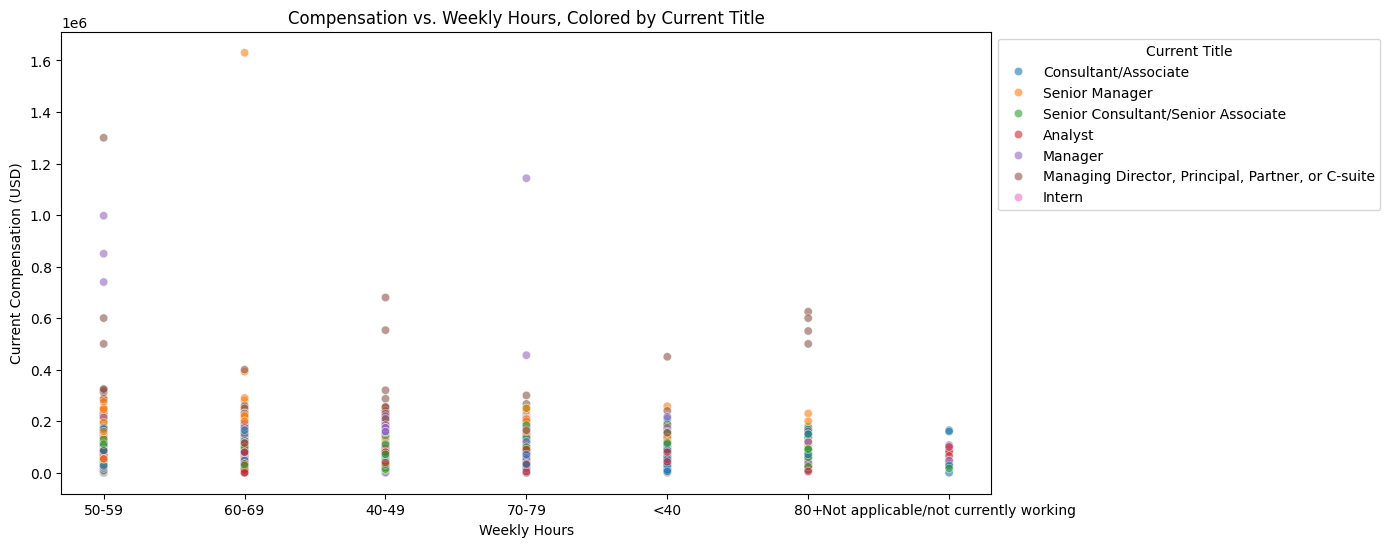

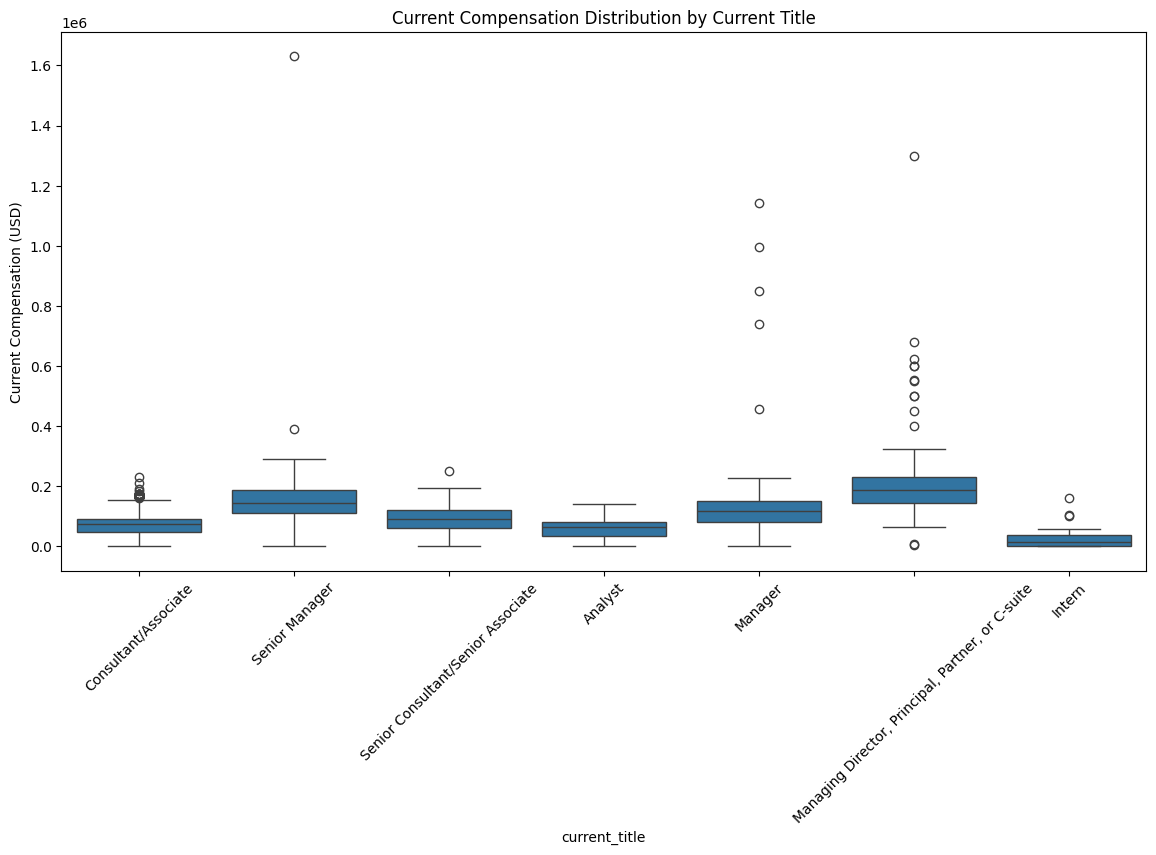

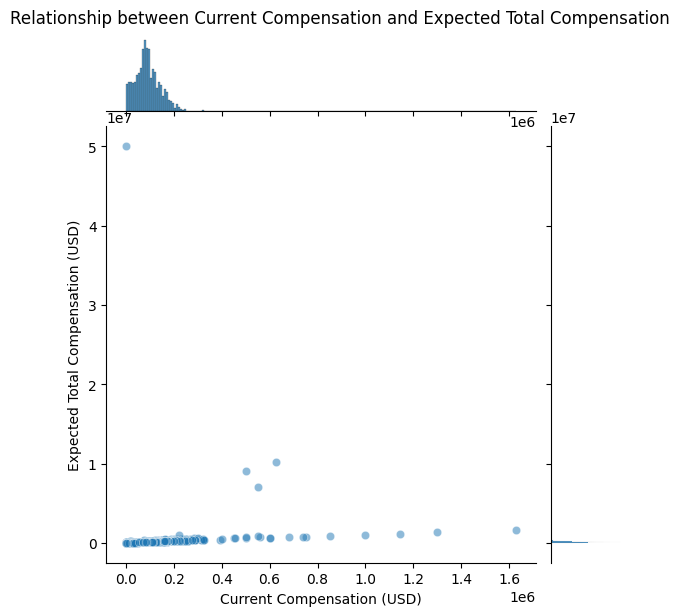

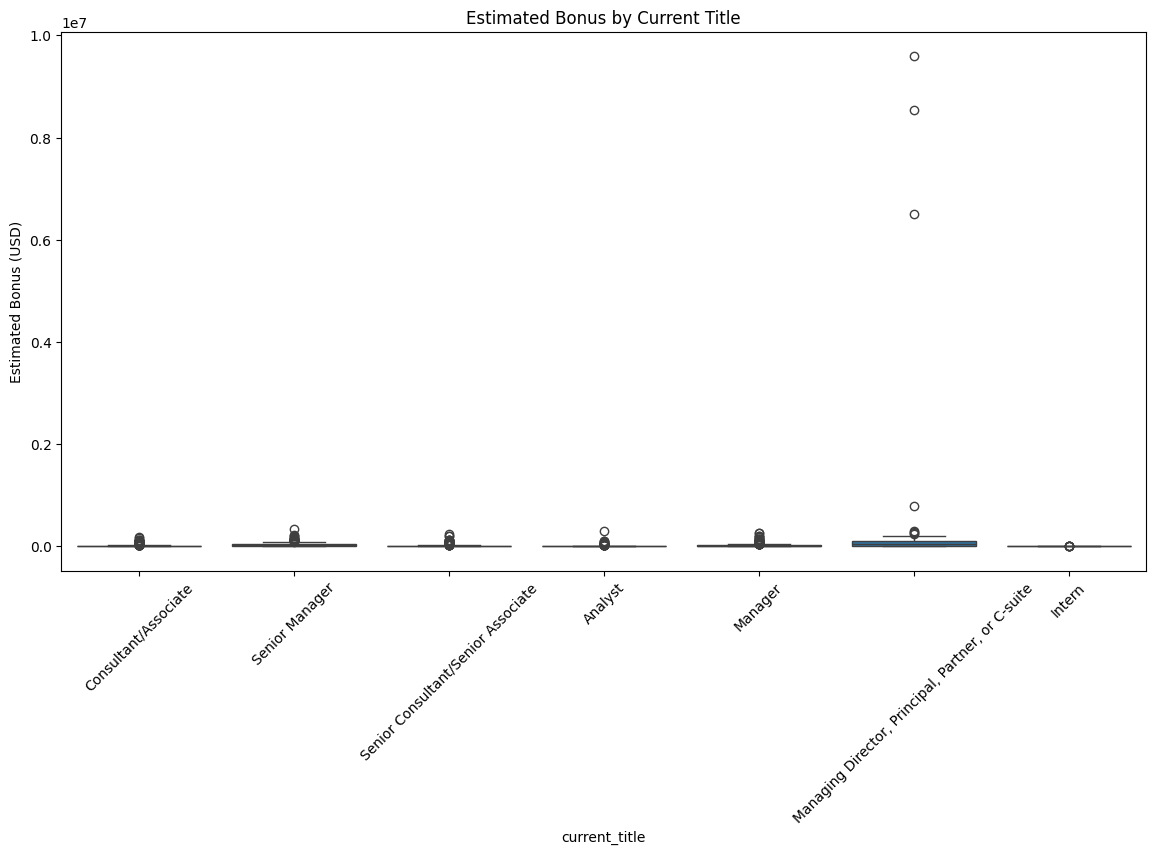

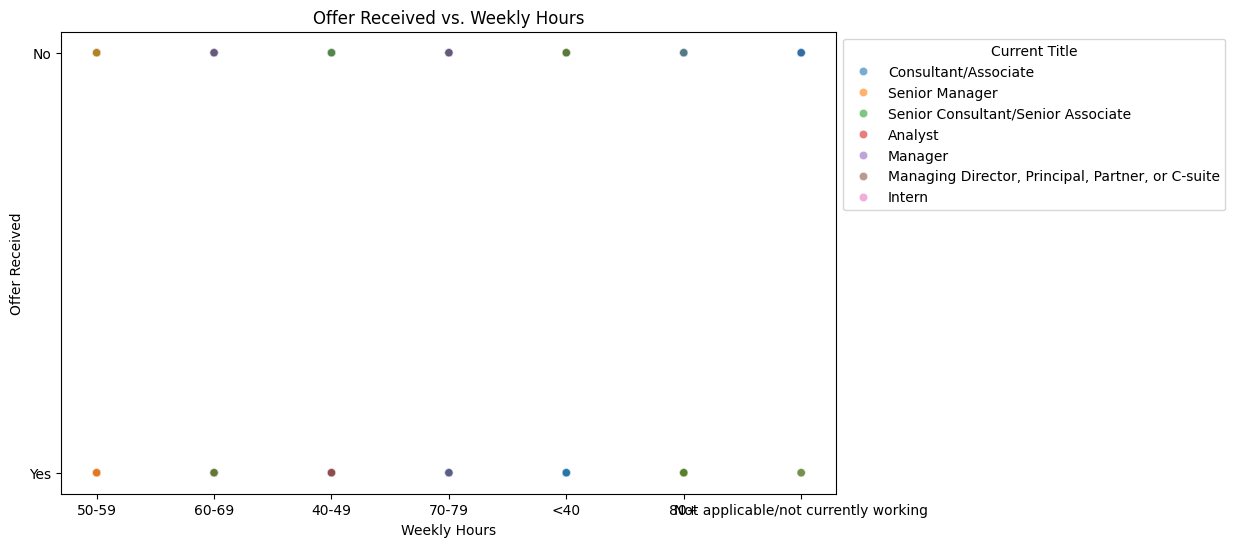

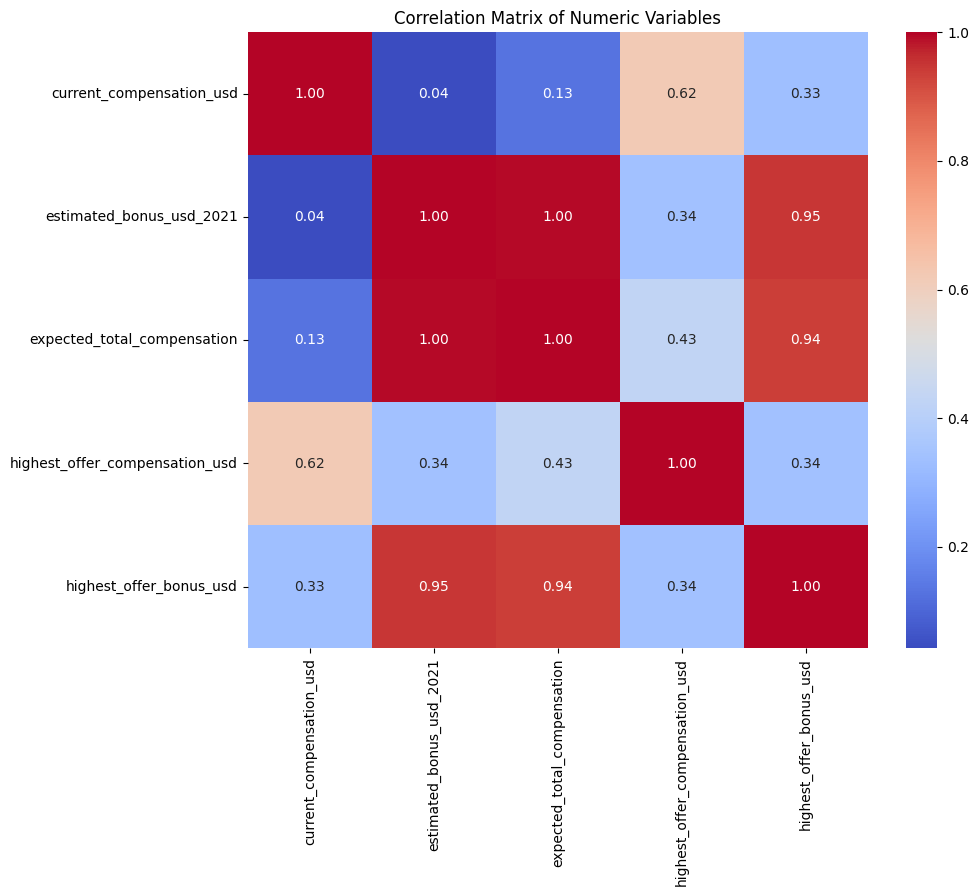

In [59]:

# Define the key variables based on the new column names
response_var = 'current_compensation_usd'
predictor_vars = [
    'current_title', 'weekly_hours', 'expected_total_compensation',
    'estimated_bonus_usd_2021', 'offer_received', 'work_life_balance'
]

# 1. Scatter plot to examine `current_compensation_usd` vs. `weekly_hours`, colored by `current_title`
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['weekly_hours'], y=df[response_var], hue=df['current_title'], alpha=0.6)
plt.title('Compensation vs. Weekly Hours, Colored by Current Title')
plt.xlabel('Weekly Hours')
plt.ylabel('Current Compensation (USD)')
plt.legend(title='Current Title', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# 2. Boxplot to show distribution of `current_compensation_usd` by `current_title`
plt.figure(figsize=(14, 7))
sns.boxplot(x='current_title', y=response_var, data=df)
plt.title('Current Compensation Distribution by Current Title')
plt.xticks(rotation=45)
plt.ylabel('Current Compensation (USD)')
plt.show()

# 3. Joint plot to explore `current_compensation_usd` vs. `expected_total_compensation`
sns.jointplot(x=response_var, y='expected_total_compensation', data=df, kind='scatter', alpha=0.5)
plt.suptitle('Relationship between Current Compensation and Expected Total Compensation', y=1.02)
plt.xlabel('Current Compensation (USD)')
plt.ylabel('Expected Total Compensation (USD)')
plt.show()

# 4. Boxplot of `estimated_bonus_usd_2021` by `current_title`
plt.figure(figsize=(14, 7))
sns.boxplot(x='current_title', y='estimated_bonus_usd_2021', data=df)
plt.title('Estimated Bonus by Current Title')
plt.xticks(rotation=45)
plt.ylabel('Estimated Bonus (USD)')
plt.show()

# 5. Scatter plot to explore `weekly_hours` vs. `offer_received`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weekly_hours', y='offer_received', data=df, hue='current_title', alpha=0.6)
plt.title('Offer Received vs. Weekly Hours')
plt.xlabel('Weekly Hours')
plt.ylabel('Offer Received')
plt.legend(title='Current Title', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# 6. Heatmap of correlation matrix to explore numeric variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Optional: 7. Build a Simple Regression Model to Predict `current_compensation_usd`
# Selecting predictor variables
X = df[['weekly_hours', 'expected_total_compensation', 'estimated_bonus_usd_2021']].fillna(0)  # Handle any missing values
X = sm.add_constant(X)  # Adds an intercept term to the model
y = df[response_var]




In [62]:
# Print unique values to identify problematic formats in each column
print("Unique values in 'weekly_hours':", df['weekly_hours'].unique())
print("Unique values in 'expected_total_compensation':", df['expected_total_compensation'].unique())
print("Unique values in 'estimated_bonus_usd_2021':", df['estimated_bonus_usd_2021'].unique())
print("Unique values in 'current_compensation_usd':", df['current_compensation_usd'].unique())


Unique values in 'weekly_hours': ['50-59' '60-69' '40-49' '70-79' '<40' '80+'
 'Not applicable/not currently working']
Unique values in 'expected_total_compensation': [164000. 192000. 180000. ...   6580.  86400. 119500.]
Unique values in 'estimated_bonus_usd_2021': [1.700000e+04 5.000000e+04 3.000000e+04 1.000000e+04 3.200000e+04
 2.000000e+03 1.800000e+04 8.500000e+02 1.200000e+04 1.000000e+03
 1.650000e+04 4.000000e+03 5.500000e+03 7.000000e+03 2.100000e+04
 4.000000e+04 1.250000e+04 3.700000e+04 2.500000e+04 1.635000e+03
 5.000000e+03 1.100000e+03 1.500000e+04 7.000000e+04 1.000000e+00
 1.100000e+04 3.500000e+03 2.650000e+04 2.000000e+04 1.019000e+03
 8.000000e+03 6.000000e+03 1.050000e+04 2.800000e+04 9.000000e+03
 8.100000e+04 2.500000e+05 1.780000e+03 2.000000e+05 2.500000e+03
 7.069120e+03 1.450000e+04 1.479000e+03 9.415000e+03 4.216000e+03
 1.000000e+05 3.000000e+03 1.750000e+04 2.250000e+05 4.700000e+04
 5.381000e+03 3.363000e+03 6.244000e+03 4.400000e+04 9.000000e+04
 3.52800

In [63]:


# Convert weekly_hours ranges to numeric by handling each case
def convert_weekly_hours(value):
    if isinstance(value, str):
        if '-' in value:  # Handle range values (e.g., '50-59')
            start, end = value.split('-')
            return (float(start) + float(end)) / 2
        elif '<' in value:  # Handle '<40'
            return 35  # approximate midpoint below 40
        elif '80+' in value:  # Handle '80+'
            return 85  # approximate midpoint above 80
        elif 'Not applicable' in value:  # Handle non-numeric entry
            return np.nan  # Set as NaN to exclude it from analysis
    return pd.to_numeric(value, errors='coerce')

# Apply conversion to the weekly_hours column
df['weekly_hours'] = df['weekly_hours'].apply(convert_weekly_hours)

# Fill remaining NaNs in weekly_hours with the median
df['weekly_hours'] = df['weekly_hours'].fillna(df['weekly_hours'].median())

# Confirm conversion for weekly_hours
print("Unique values in 'weekly_hours' after conversion:", df['weekly_hours'].unique())

# Proceed with the rest of the analysis
# Convert other columns to numeric if not already done and handle missing values
df['expected_total_compensation'] = pd.to_numeric(df['expected_total_compensation'], errors='coerce').fillna(df['expected_total_compensation'].median())
df['estimated_bonus_usd_2021'] = pd.to_numeric(df['estimated_bonus_usd_2021'], errors='coerce').fillna(df['estimated_bonus_usd_2021'].median())
df['current_compensation_usd'] = pd.to_numeric(df['current_compensation_usd'], errors='coerce').fillna(df['current_compensation_usd'].median())

# Print data types to confirm all numeric
print("Data types after conversion:")
print(df[['weekly_hours', 'expected_total_compensation', 'estimated_bonus_usd_2021', 'current_compensation_usd']].dtypes)

# Prepare data for regression model
X = df[['weekly_hours', 'expected_total_compensation', 'estimated_bonus_usd_2021']]
y = df['current_compensation_usd']
X = sm.add_constant(X)  # Adds an intercept term to the model

# Build and fit the model
model = sm.OLS(y, X).fit()
print(model.summary())


Unique values in 'weekly_hours' after conversion: [54.5 64.5 44.5 74.5 35.  85. ]
Data types after conversion:
weekly_hours                   float64
expected_total_compensation    float64
estimated_bonus_usd_2021       float64
current_compensation_usd       float64
dtype: object
                               OLS Regression Results                               
Dep. Variable:     current_compensation_usd   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 7.622e+31
Date:                      Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                              10:41:18   Log-Likelihood:                 86050.
No. Observations:                      4200   AIC:                        -1.721e+05
Df Residuals:                          4196   BIC:                        -1.721e+05
Df Model:                              

In [64]:
# Adjusted model excluding one of the highly correlated variables
X_adjusted = df[['weekly_hours', 'expected_total_compensation']]
X_adjusted = sm.add_constant(X_adjusted)
model_adjusted = sm.OLS(y, X_adjusted).fit()
print(model_adjusted.summary())


                               OLS Regression Results                               
Dep. Variable:     current_compensation_usd   R-squared:                       0.022
Model:                                  OLS   Adj. R-squared:                  0.022
Method:                       Least Squares   F-statistic:                     47.66
Date:                      Mon, 28 Oct 2024   Prob (F-statistic):           3.41e-21
Time:                              10:42:03   Log-Likelihood:                -52856.
No. Observations:                      4200   AIC:                         1.057e+05
Df Residuals:                          4197   BIC:                         1.057e+05
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------